## Exercise Set 2 for OSM 

### Dynamic Programming with John Stachurski

### Wei Han Chia

Exercises for the [OSM](https://bfi.uchicago.edu/osm) bootcamp dynamic programming section.

We will use the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

### Exercise 1

Consider the setting of the [stochastic optimal growth model](https://lectures.quantecon.org/py/optgrowth.html), with the same notation and same assumptions on the primitives $u$, $f$, $\beta$ and $\phi$. 

Let $\mathscr C$ be all continuous bounded functions on $\mathbb R_+$.

Let $\sigma \in \Sigma$ be any feasible policy and let $U$ be the operator from $\mathscr C$ to itself defined by

$$ Uw(y) = u(\sigma(y)) + \beta \int w(f(y - \sigma(y))z) \phi(dz) \qquad (y \in \mathbb R_+)$$

Prove that $U$ is a contraction mapping with respect to the supremum distance.  Argue that the unique fixed point of $U$ in $\mathscr C$ is $v_\sigma$.

("Argue" means provide a sketch of a proof that contains the key ideas, plus some intuition.  Or give a complete, formal proof, if you can.)

Once again we will prove that $U$ is a contraction mapping.

$$\begin{align}
d(U w(y) , U w'(y))&= d(u(\sigma(y))  + \beta \int w(f(y - \sigma(y)z)\phi(dz) , u(\sigma(y)) - \beta \int w'(f(y - \sigma(y)z)\phi d(z)) \\
&= \beta d(\int w(f(y - \sigma(y)z)\phi (dz), \int w'(f(y - \sigma(y)z)\phi (dz))
\end{align}
$$

Since we are using the supremeum distance metric then we know that the above expression is equivalent to finding

$$\begin{align}  \sup \left| \mathbb{E}[w(f(y - \sigma(y))z) - w'(f(y - \sigma(y))z)] \right| &\leq \sup \left| w(f(y - \sigma(y))z) - w'(f(y - \sigma(y))z) \right| \\
&= d(w,w') \end{align}$$

Now that we have shown that U is a contraction mapping with respect to the supremum distance, we know that there exists a unique fixed point for the equation $U(w) = w$. Next ,we want to show that this unique fixed point is $v_\sigma$.

We can prove this simply by considering the definition of $v_\sigma$ and using it to show that $Uv_\sigma = v_\sigma$. This implies that $v_\sigma$ is a fixed point. Since this fixed point is unique, then it must be $v_\sigma$.

### Exercise 2

Notation and concepts continue from exercise 2.

Use the fact you proved in exercise 2, combined with piecewise linear interpolation method we used for the Bellman operator, to compute and plot good approximations of the value $v_\sigma$ of the policies

* $\sigma_1(y) = 0.95 y$
* $\sigma_2(y) = H(y) y$ where $H$ is the cdf of the lognormal $LN(0, 0.5)$ distribution.

For the latter use `scipy.stats.lognorm.cdf(y, 0.5)`

For the primitives, use the default specification in the `LogLinearOG` class from the [stochastic optimal growth model lecture](https://lectures.quantecon.org/py/optgrowth.html).

Plot your results, choosing grid and plotting dimensions to best illustrate the two functions.  Based on the plot alone, argue that neither of these policies is an optimal policy.

In [74]:
import numpy as np
from scipy.optimize import fminbound
from scipy import stats
import matplotlib.pyplot as plt

alpha, beta, mu, s = 0.4, 0.96 ,0 , 0.1


#We can just compute this out normally
#First let us generate a grid of shocks and y

grid_max = 4         # Largest grid point
grid_size = 200      # Number of grid points
shock_size = 250     # Number of shock draws in Monte Carlo integral

grid = np.linspace(1e-5, grid_max, grid_size)
shocks = np.exp(mu + s * np.random.randn(shock_size))

#Now let us define a policy function
def pol1(y):
    return 0.95*y

def pol2(y):
    return scipy.stats.lognorm.cdf(y,0.5)*y

#Let us also define production function
def f(k):
    return k ** alpha
#Now we define a function to run the iterative approximation solution method.


def Ex2(w, grid, pol, f, shocks):
    ''' Equivalent of Bellman Operator with policy function given
    pol = policy function
    f = production function
    eps = error tolerance
    w = grid of value function
    grid = grid of incomes
    shocks = grid of shocks'''
    w_func = lambda x: np.interp(x, grid, w)
    
    Tw = np.empty_like(w)
    
    for i,y in enumerate(grid):
        Tw[i] = np.log(pol(y)) + beta*np.mean(w_func(f(y- pol(y))) * shocks)
   
    return Tw

def ffp(T, w, pol, shocks, eps=1e-6, maxiter=500):
    error = 1
    it = 0
    while error > eps and it < maxiter:
        Tw = Ex2(w, grid, pol, f, shocks)
        error = np.linalg.norm(Tw - w)
        w = Tw
        it += 1
    
    return w

In [75]:
w_int = 5 * np.log(grid)
res = ffp(Ex2, w_int, pol1, shocks)
res2 = ffp(Ex2, w_int, pol2, shocks)

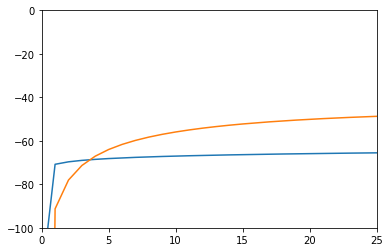

In [77]:
plt.plot(res)
plt.plot(res2)
plt.ylim([-100,0])
plt.xlim([0,25])
plt.show()

From the 2 graphs, we see that both value functions for each policy dominates each other when at a certain income level, which suggests that neither can be our optimal policy function